In [43]:
import sys
sys.path.append('../')
from scripts.helpers import ROC_fromTuples, getEvents_fromFile, compute_efficiency, compute_rates, where
import ROOT
from ROOT import TTree 
from sklearn.metrics import roc_curve, auc
import numpy as np
import uproot
import awkward as ak
%matplotlib inline
import matplotlib.pyplot as plt

In [44]:
# get trees for efficiency from file
fileName_eff = "/Users/mascella/workspace/EPR-workspace/analysis_deepTau/data/VBFToTauTau_lowPt.root"
treeName_gen = "gen_counter" 
treeName_in = "initial_counter" 
events_gen, events_in = getEvents_fromFile(fileName_eff, treeName_gen, treeName_in)

(array([8808., 7737., 3100., 1276.,  666.,  478.,  403.,  353.,  344.,
         297.,  422.,  397.,  417.,  423.,  394.,  430.,  379.,  375.,
         379.,  346.,  316.,  320.,  256.,  302.,  289.,  249.,  269.,
         251.,  215.,  223.,  193.,  197.,  189.,  176.,  178.,  174.,
         162.,  129.,  144.,  131.,  125.,  132.,  107.,  119.,  101.,
          98.,   85.,   93.,   87.,   75.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.], dtype=float32),
 <BarContainer object of 50 artists>)

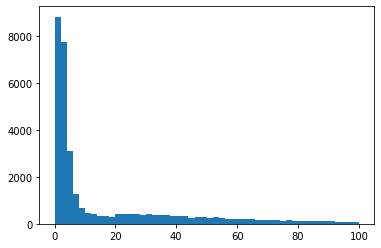

In [54]:
plt.hist(events_in['tau_pt'][events_in['lepton_gen_match']==6].flatten(), bins=50, range=[0, 100])

[[6 5 3 6 6] [5 5 6 6] [5 5]]
[[0.0 56.07422 30.53392 0.0 0.0] [107.08822 32.639126 0.0 0.0] [92.21756 77.69355]]
[[85.669334 51.37048 37.74064 2.775768 0.96311593] [108.76359 32.594044 2.7935212 0.6905364] [86.91822 81.08314]]
[[False True False False False] [True False False False] [True True]]
[[0.117966145 0.9104964 0.9381175 0.23812388 0.08566072] [0.8050635 0.8438599 0.24997549 0.48564354] [0.97067297 0.9867176]]
[[0.9104964] [0.8050635] [0.97067297 0.9867176]]


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  21.,  45.,
         79., 208., 437., 528., 637., 661., 663., 678., 687., 607., 624.,
        611., 573., 524., 514., 527., 483., 459., 446., 433., 401., 368.,
        345., 342., 326., 307., 319., 292., 231., 251., 240., 229., 226.,
        212., 176., 197., 164., 170., 151.]),
 array([ 20. ,  21.6,  23.2,  24.8,  26.4,  28. ,  29.6,  31.2,  32.8,
         34.4,  36. ,  37.6,  39.2,  40.8,  42.4,  44. ,  45.6,  47.2,
         48.8,  50.4,  52. ,  53.6,  55.2,  56.8,  58.4,  60. ,  61.6,
         63.2,  64.8,  66.4,  68. ,  69.6,  71.2,  72.8,  74.4,  76. ,
         77.6,  79.2,  80.8,  82.4,  84. ,  85.6,  87.2,  88.8,  90.4,
         92. ,  93.6,  95.2,  96.8,  98.4, 100. ], dtype=float32),
 <BarContainer object of 50 artists>)

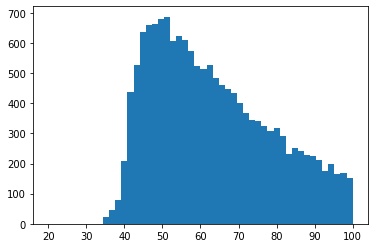

In [46]:
r = range(5,8)
print(events_in["lepton_gen_match"][r])
print(events_in['gen_tau_pt'][r]) 
print(events_in['tau_pt'][r])
mask = (events_in["lepton_gen_match"]==5) & (events_in['gen_tau_pt']>35.) & (events_in['tau_pt']>40.)
print(mask[r])
true_taus_pred = events_in['deepTau_VSjet'][mask] # deepTau prediction for tau_h
print(events_in['deepTau_VSjet'][r])
print(true_taus_pred[r])
plt.hist((events_in['gen_tau_pt'][mask]).flatten(), bins=50, range=[20, 100])

AUC ROC: 0.9717806626079487
7595


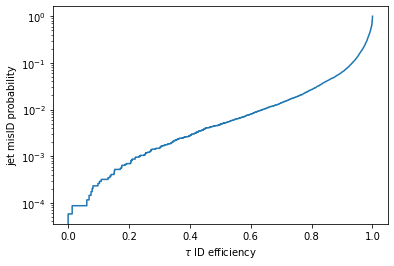

In [47]:
# generate ROC curve for deepTau_VSjet
fpr, tpr, thr, pred, truth = ROC_fromTuples(events_in)
score = auc(fpr, tpr)
print("AUC ROC:", score)
plt.yscale('log')
plt.xlabel(r'$\tau$ ID efficiency')
plt.ylabel('jet misID probability')
plt.plot(tpr, fpr, '-')
print(len(thr))

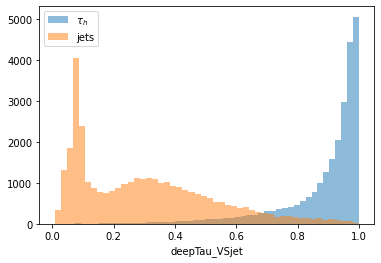

In [48]:
# deepTau_VSjet distribution for signal and background
plt.hist(pred[truth==1].flatten(), bins=50, alpha=0.5, label=r"$\tau_h$")
plt.hist(pred[truth==0].flatten(), bins=50, alpha=0.5, label="jets")
plt.legend()
plt.xlabel("deepTau_VSjet")
plt.savefig("VSjet_distr.pdf")

In [49]:
# compute efficiencies
# from scipy.stats import loguniform
# a, b = 0.01, 1
# x = np.linspace(loguniform.ppf(0.99, a, b),
#                 loguniform.ppf(0.01, a, b), 100)
# thr = loguniform.pdf(1-x, a, b)
eff = compute_efficiency(events_in, len(events_gen), thr, 40.)
print(eff)
print(len(events_gen))

[   0.    0.    0. ... 5184. 5184. 5184.]
[0.      0.      0.      ... 0.01728 0.01728 0.01728]
300000


1914


(array([  1.,  19., 211., 348., 358., 471., 486., 379., 298., 249., 217.,
        180., 133., 100.,  87.,  66.,  49.,  32.,  31.,  23.,  33.,  23.,
         22.,  10.,   9.,   7.,   5.,   2.,   3.,   5.,   1.,   7.,   2.,
          0.,   1.,   1.,   0.,   1.,   0.,   0.,   2.,   3.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   2.]),
 array([ 16.000814,  26.387598,  36.77438 ,  47.161163,  57.547947,
         67.93473 ,  78.32151 ,  88.7083  ,  99.09508 , 109.481865,
        119.868645, 130.25543 , 140.64221 , 151.02899 , 161.41577 ,
        171.80257 , 182.18935 , 192.57613 , 202.9629  , 213.34969 ,
        223.73648 , 234.12326 , 244.51004 , 254.89682 , 265.2836  ,
        275.67038 , 286.05716 , 296.44397 , 306.83075 , 317.21753 ,
        327.6043  , 337.9911  , 348.37787 , 358.76465 , 369.15143 ,
        379.5382  , 389.92502 , 400.3118  , 410.69858 , 421.08536 ,
        431.47214 , 441.85892 , 452.2457  , 462.63248 , 473.01926 ,
        483.40604 , 493.79285 , 504.17963 , 51

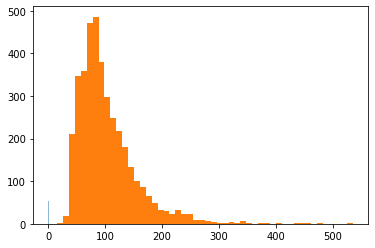

In [50]:
# get trees for rates from file
fileName_rates = "/Users/mascella/workspace/EPR-workspace/analysis_deepTau/data/HLTPhys_1-8.root"
events_gen_rates, events_in_rates = getEvents_fromFile(fileName_rates, treeName_gen, treeName_in)
print(len(events_in_rates))
plt.hist(events_in_rates['deepTau_VSjet'].flatten(), bins=50, alpha=0.5)
plt.hist(events_in_rates['tau_pt'].flatten(), bins=50)

In [51]:
# compute rates
Ntot = len(events_gen_rates)
L1rate = 73455.34
rates = compute_rates(events_in_rates, Ntot, L1rate, thr, 40.)
print(rates)

[ 0.          0.          0.         ... 72.19628062 72.19628062
 72.19628062]


[0.00000000e+00 0.00000000e+00 3.90672514e-02 2.34403509e-01
 5.46941520e-01 1.13295029e+00 2.26590058e+00 4.02392690e+00
 6.21169298e+00 8.36039180e+00 1.07825614e+01 1.34782017e+01
 1.66035819e+01 2.02368362e+01 2.37919561e+01 2.71517397e+01
 2.96911111e+01 3.26211549e+01 3.59418713e+01 3.86765789e+01
 4.14112865e+01 4.34427836e+01 4.62556257e+01 4.85215263e+01
 5.00451491e+01 5.15687719e+01 5.37174707e+01 5.62959093e+01
 5.74288596e+01 5.93822222e+01 6.05151724e+01 6.18825262e+01
 6.32498800e+01 6.41874941e+01 6.52423099e+01 6.60236549e+01
 6.63361929e+01 6.68831344e+01 6.77035467e+01 6.83676900e+01
 6.90709005e+01 6.95006403e+01 6.98522455e+01 7.00475818e+01
 7.03210526e+01 7.05945233e+01 7.08289268e+01 7.09461286e+01
 7.10633303e+01 7.12977338e+01 7.13758683e+01 7.14930701e+01
 7.16102719e+01 7.16884064e+01 7.17274736e+01 7.18446754e+01
 7.18837426e+01 7.18837426e+01 7.18837426e+01 7.18837426e+01
 7.20790789e+01 7.21572134e+01 7.21572134e+01 7.21572134e+01
 7.21572134e+01 7.215721

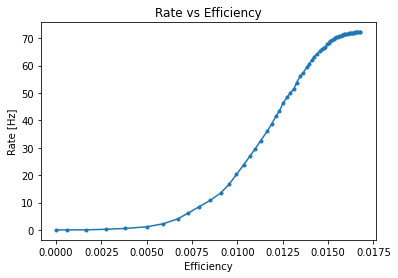

In [52]:
plt.xlabel("Efficiency")
plt.ylabel("Rate [Hz]")
plt.title("Rate vs Efficiency")
plt.plot(eff[range(0, len(thr)-1000, 100)], rates[range(0, len(thr)-1000, 100)], '.-')
print(rates[range(0, len(thr)-1000, 100)])